In [69]:
import numpy as np
import csv
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
def F(x,a,b,c,d,f):
    return (x-a)*(x-b)*np.sin(x*c-d)*f
#(x**2)*(b*np.sin(x*c-f*np.pi))*(x+d)+a
            
X_nod=[]
Y_nod=[]
with open('lab1.csv', "r") as file_obj:
    readr= csv.reader(file_obj)
    for row in readr:
        str=" ".join(row).split(" ")
        X_nod.append(float(str[0]))
        Y_nod.append(float(str[1]))
sln = curve_fit(F, X_nod, Y_nod)[0]
print('Полученные параметры: ',sln)

Полученные параметры:  [ 8.01886845e-01 -5.31324445e-08  8.10000000e-01  1.57079633e+00
  1.06000000e+00]


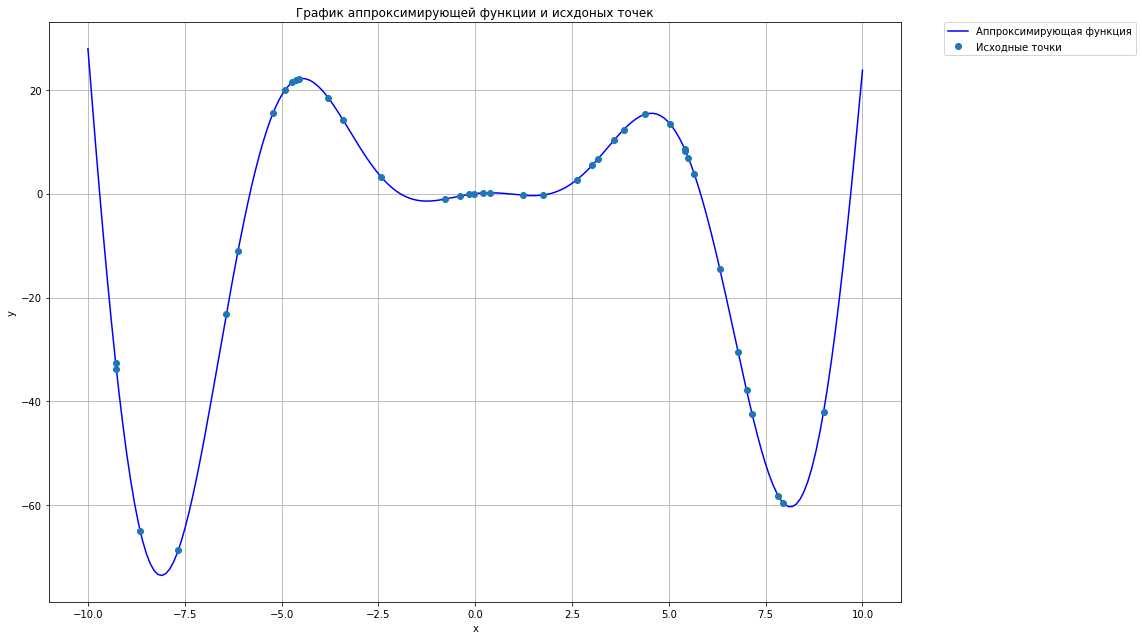

In [75]:
x_f=np.linspace(-10,10,200)
y_f=F(x_f,sln[0],sln[1],sln[2],sln[3],sln[4])
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(16, 9))
axes.plot(x_f,y_f,'b',label='Аппроксимирующая функция')
axes.plot(X_nod,Y_nod,'o',label='Исходные точки')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('График аппроксимирующей функции и исхдоных точек')
axes.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
axes.grid(True)
fig.tight_layout()
plt.show()

In [74]:
n=len(X_nod)
whole = 0
for i in range(n):
    step = (Y_nod[i] - F(X_nod[i],sln[0],sln[1],sln[2],sln[3],sln[4]))**2
    whole += step
quaderr = (whole/n)**(1/2)
print('Среднеквадратичная ошибка аппроксимации данных: ',quaderr)
err=0
for i in range(n):
    ernow=abs(Y_nod[i] - F(X_nod[i],sln[0],sln[1],sln[2],sln[3],sln[4]))
    if err<ernow:
        err=ernow
print('Максимальное отклонение: ',err)

Среднеквадратичная ошибка аппроксимации данных:  2.333206698343616e-08
Максимальное отклонение:  4.5116661989696993e-08
